1.Import Libraries

In [22]:
import numpy as np 
import matplotlib.pyplot as plt

2.Activation Function

In [23]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)  


3.Initialize Dataset

In [24]:
# Input (X) and Target (Y)
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

Y = np.array([[0],
              [1],
              [1],
              [0]])  


4.Initialize Weights & Biases

In [25]:
np.random.seed(42)

input_neurons = 2
hidden_neurons = 2
output_neurons = 1

W1 = np.random.randn(input_neurons, hidden_neurons)
b1 = np.random.randn(1, hidden_neurons)

W2 = np.random.randn(hidden_neurons, output_neurons)
b2 = np.random.randn(1, output_neurons)


5.Training Parameters

In [26]:
learning_rate = 0.1
epochs = 10000
loss_list = []


6.Forward Propagation + Loss

In [27]:
for epoch in range(epochs):

    # ---- Forward Propagation ----
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)

    Z2 = np.dot(A1, W2) + b2
    Y_hat = sigmoid(Z2)

    # ---- Compute Loss (MSE) ----
    loss = np.mean((Y - Y_hat) ** 2)
    loss_list.append(loss)


7.Backpropagation

In [28]:
    # Output layer error
    dY_hat = Y_hat - Y
    dZ2 = dY_hat * sigmoid_derivative(Y_hat)

    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    # Hidden layer error
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)

    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)


8.Update Weights & Biases

In [29]:
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1


9.Visualize Loss vs Epochs

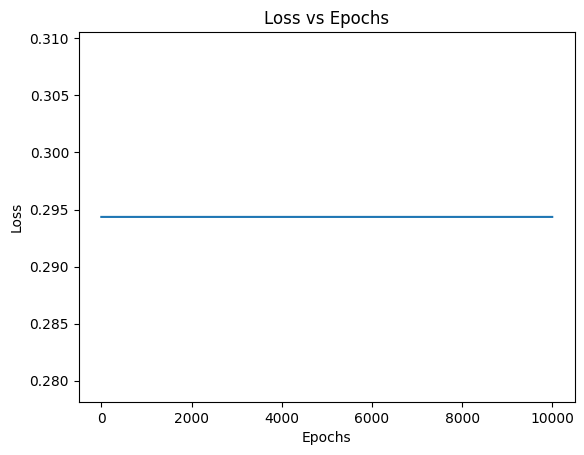

In [30]:
plt.plot(loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()


10.Test Model

In [31]:
print("Final Predictions:")
print(np.round(Y_hat, 3))


Final Predictions:
[[0.638]
 [0.747]
 [0.676]
 [0.775]]
